In [278]:
# Because I knew I would be using bag-of-words and Term Frequency–Inverse Document Frequency (TF-IDF) to extract features, this seemed like a good choice. Using longer text will hopefully allow for distinct words and features for my real and fake news data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import itertools

from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve,classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer  #The number of times a word appears in a document is its Term Frequency
from sklearn.linear_model import PassiveAggressiveClassifier #Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [88]:
pd.__version__

'0.25.3'

In [133]:
#Read the data
df=pd.read_csv('news.csv')

In [137]:
#Get shape and head
df.head()
# scatter_matrix(df['label'])
# plt.show()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [91]:
df.shape

(6335, 4)

In [92]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [93]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fe

In [94]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [95]:
# pd.get_dummies(labels, prefix_sep=',')

In [298]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=0)

In [299]:
# hash_vectorizer = HashingVectorizer(stop_words='english')
# x_train = hash_vectorizer.fit_transform(x_train)                    Accuracy:91.53
# x_test = hash_vectorizer.transform(x_test)

# cv = CountVectorizer(max_features=5000)
# x_train = cv.fit_transform(x_train).todense()
# x_test = cv.transform(x_test)


#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
x_train=tfidf_vectorizer.fit_transform(x_train) 
x_test=tfidf_vectorizer.transform(x_test)
print(tfidf_vectorizer.get_stop_words())
# print(tfidf_vectorizer.inverse_transform(x_train))

frozenset({'thereafter', 'also', 'least', 'what', 'take', 'nobody', 'with', 'but', 'again', 'amongst', 'seem', 'name', 'becoming', 'ourselves', 'twenty', 'your', 'therefore', 'formerly', 'am', 'out', 'describe', 'neither', 'sixty', 'beforehand', 'move', 'yours', 'others', 'along', 'eight', 'may', 'fire', 'hundred', 'together', 'us', 'a', 'still', 'show', 'another', 'will', 'somehow', 'bill', 'than', 'her', 'then', 'such', 'noone', 'has', 'call', 'now', 'an', 'if', 'hereupon', 'nothing', 'less', 'any', 'thru', 'de', 'rather', 'amount', 'that', 'most', 'either', 'these', 'yourself', 'even', 'keep', 'who', 'too', 'them', 'ten', 'once', 'more', 'all', 'his', 'over', 'since', 'cannot', 'me', 'was', 'see', 'alone', 'one', 'became', 'be', 'three', 'un', 'fifty', 'might', 'myself', 'sometime', 'other', 'although', 'everyone', 'is', 'whose', 'himself', 'behind', 'hereby', 'hereafter', 'part', 'him', 'into', 'meanwhile', 'however', 'anything', 'through', 'had', 'former', 'anyone', 'off', 'five',

In [283]:
#DataFlair - Initialize a PassiveAggressiveClassifier
#pac=PassiveAggressiveClassifier(min_iter=50)
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.13%


In [280]:
cfr = classification_report(y_test,y_pred)
cfr

'              precision    recall  f1-score   support\n\n        FAKE       0.96      0.68      0.80       615\n        REAL       0.76      0.97      0.86       652\n\n    accuracy                           0.83      1267\n   macro avg       0.86      0.83      0.83      1267\nweighted avg       0.86      0.83      0.83      1267\n'

In [99]:
#DataFlair - Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

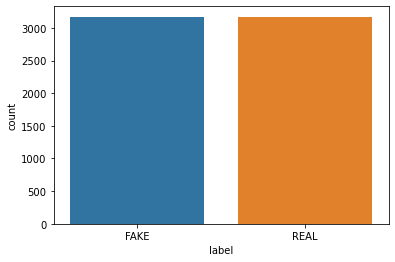

In [15]:
sns.countplot(x='label', data=df)
plt.show()

In [277]:
# df['Real & Fake'] = pd.get_dummies(df["label"], drop_first=True)
# print(df[['Real & Fake']])
# pd.get_dummies(df["label"])

In [286]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


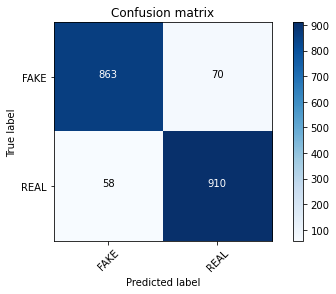

In [287]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

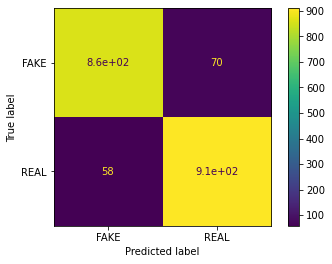

In [101]:
plot_confusion_matrix(pac, x_test, y_test)
plt.show()

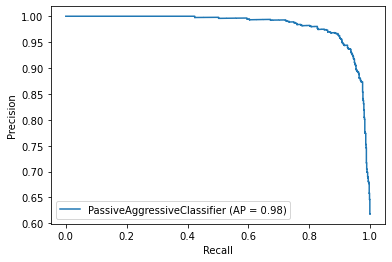

In [120]:
plot_precision_recall_curve(pac, x_test, y_test)
plt.show() 

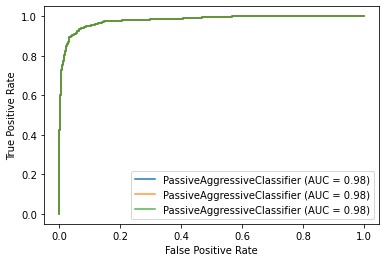

In [119]:
a_disp = plot_roc_curve(pac, x_test, y_test)
ax = plt.gca()
rfc_disp = plot_roc_curve(pac, x_test, y_test,ax=ax, alpha=0.8)
a_disp.plot(ax=ax, alpha=0.8)

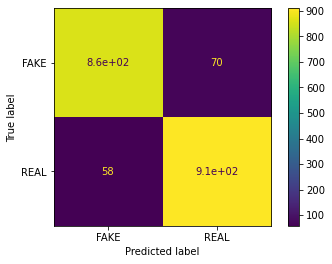

In [127]:
ff = ConfusionMatrixDisplay(cm,['FAKE', 'REAL'])
ff.plot()

In [202]:
# Here we are using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [203]:
dtc_cm = confusion_matrix(y_test,y_pred)
dtc_cm

array([[497, 118],
       [116, 536]], dtype=int64)

In [276]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.19%


In [230]:
# Here we are using Support vector machine algorithm
from sklearn.svm import SVC

# svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#       decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#       max_iter=-1, probability=False, random_state=None, shrinking=True,
#       tol=0.001, verbose=False)
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

In [275]:
svm_score=accuracy_score(y_test,predictions)
print(f'Accuracy: {round(svm_score*100,2)}%')

Accuracy: 92.9%


In [232]:
# Here we are using Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
rfc_pred = svm.predict(x_test)

In [274]:
rfc_score=accuracy_score(y_test,rfc_pred)
print(f'Accuracy: {round(rfc_score*100,2)}%')

Accuracy: 92.9%


In [273]:
mnlb = MultinomialNB()
mnlb.fit(x_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=mnlb.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.19%
